In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

In [96]:
housing_data = pd.read_csv('~/Downloads/housing-data1.csv')

In [107]:
housing_data

,sqft,bdrms,age,price
0,2104,3,70.0,399900
1,1600,3,28.0,329900
2,2400,3,44.0,369000
3,1416,2,49.0,232000
4,3000,4,75.0,539900
5,1985,4,61.0,299900
6,1534,3,12.0,314900
7,1427,3,57.0,198999
8,1380,3,14.0,212000
9,1494,3,15.0,242500


##### 1.
What is the data type of the price column in the dataset?

In [109]:
housing_data.price.dtype

dtype('int64')

### 2. 
Create a Series from entries in the age column, but convert the entries to strings

In [54]:
housing_data.age.astype('str')

0     70
1     28
2     44
3     49
4     75
5     61
6     12
7     57
8     14
9     15
10     7
11    27
12    45
13    49
14    58
15    77
16    62
17    78
18     5
19    21
20    44
21    79
22    13
23    53
24    36
25    60
26    29
27    13
28    28
29    25
30    40
31     5
32    75
33    67
34    24
35    50
36    22
37    28
38    66
39    43
40    40
41    37
42    57
43    76
44    70
45    64
46    11
Name: age, dtype: object

# 3.
Sometimes the age column is null. How many reviews in the dataset are missing a age?

In [114]:
housing_data.isnull().sum()

sqft     0
bdrms    0
age      1
price    0
dtype: int64

In [98]:
housing_data[pd.isnull(housing_data.age)]

,sqft,bdrms,age,price
13,4478,5,NaN,699900


In [102]:
housing_data[housing_data.age.isnull()]


,sqft,bdrms,age,price
13,4478,5,NaN,699900


In [111]:
housing_data.age.isnull().sum()

1

#### 4.
What are the most common wine-producing regions? Create a Series counting the number of times each value occurs in the age field. This field is often missing data, so replace missing values with Unknown. Sort in descending order.


In [94]:
housing_data.age.fillna("Unknown").value_counts().sort_values(ascending=False)

28.0       3
13.0       2
40.0       2
44.0       2
70.0       2
75.0       2
57.0       2
5.0        2
77.0       1
79.0       1
66.0       1
78.0       1
67.0       1
7.0        1
12.0       1
25.0       1
15.0       1
61.0       1
21.0       1
64.0       1
24.0       1
14.0       1
60.0       1
58.0       1
53.0       1
29.0       1
50.0       1
49.0       1
11.0       1
45.0       1
43.0       1
37.0       1
36.0       1
76.0       1
62.0       1
27.0       1
Unknown    1
22.0       1
Name: age, dtype: int64

In [66]:
housing_data.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,46.000000,47.000000
mean,2000.680851,3.170213,42.608696,340412.659574
std,794.702354,0.760982,23.106977,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.250000,249900.000000
50%,1888.000000,3.000000,43.500000,299900.000000
75%,2269.000000,4.000000,61.750000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [69]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      46 non-null float64
price    47 non-null int64
dtypes: float64(1), int64(3)
memory usage: 1.5 KB


In [70]:
housing_data = housing_data.apply(pd.to_numeric)
housing_data

,sqft,bdrms,age,price
0,2104,3,70.0,399900
1,1600,3,28.0,329900
2,2400,3,44.0,369000
3,1416,2,49.0,232000
4,3000,4,75.0,539900
5,1985,4,61.0,299900
6,1534,3,12.0,314900
7,1427,3,57.0,198999
8,1380,3,14.0,212000
9,1494,3,15.0,242500


In [41]:
df.dtypes.value_counts()

int64    4
dtype: int64

In [85]:
print('Descirbing the stat of the DF \n', df.describe())

descirbing the stat of the DF 
               sqft      bdrms        age          price
count    47.000000  47.000000  47.000000      47.000000
mean   2000.680851   3.170213  42.744681  340412.659574
std     794.702354   0.760982  22.873440  125039.899586
min     852.000000   1.000000   5.000000  169900.000000
25%    1432.000000   3.000000  24.500000  249900.000000
50%    1888.000000   3.000000  44.000000  299900.000000
75%    2269.000000   4.000000  61.500000  384450.000000
max    4478.000000   5.000000  79.000000  699900.000000


In [32]:
series = pd.Series(housing_data.price)
series

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: price, dtype: int64

age graph 



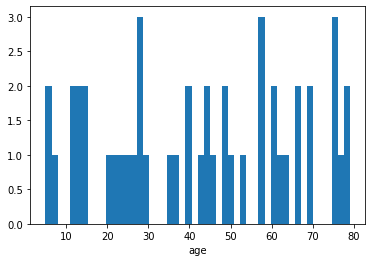

In [92]:
print('age graph \n')

_ = plt.hist(df.age, 50)
_ = plt.xlabel('age')
plt.show()